----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <u>**Hindi and Tamil Question Answering**</u>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**<u>Group 15</u>** 
---

<u>AIDI-2005-01 Capstone Term 2</u>
---

Bindia Biju (100886575)
---
Spandana Rajamahanthi (100866969)
---
Abishek Kailasam (100856936)
---
Sanath Davis (ID: 100884693)
---


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### This is a python notebook which details the various steps and processes involved in exploring, analysing, training and testing the Chaii 2021 dataset. The goal is to study question and answering in the indian languages of Tamil and Hindi.
### A project report is attached along with this submission.

## Minimum Requirements

### You will definitely need to have the following installed for running this notebook: 
    a) Pandas
    b) Sklearn
    c) Numpy
    d) Seaborn
    e) Matplotlib
    f) Pandas Profiling
    g) nltk
    h) transformers
    i) tensorflow



## Load dataset into pandas

The dataset is called 'Chaii' and can be downloaded from https://www.kaggle.com/competitions/chaii-hindi-and-tamil-question-answering/data

Hosted in git at 
https://gitlab.com/sanathdavis/capstone-2/-/raw/main/train.csv
https://gitlab.com/sanathdavis/capstone-2/-/raw/main/test.csv


In [1]:
import pandas as pd
dataset = pd.read_csv("https://gitlab.com/sanathdavis/capstone-2/-/raw/main/train.csv")
dataset

,id,context,question,answer_text,answer_start,language
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil
...,...,...,...,...,...,...
1109,26f356026,स्वामी निगमानन्द परमहंस (18 अगस्त 1880 - 29 नव...,स्वामी निगमानन्द परमहंस के तन्त्र गुरु कौन थे?,बामाक्षेपा,2691,hindi
1110,31179f1bb,भरत मुनि ने नाट्यशास्त्र नामक प्रसिद्ध ग्रन्थ ...,नित्यशास्त्र किसने लिखा है?,भरत मुनि,0,hindi
1111,0d35dc007,अग्नि पंचम (अग्नि-५) भारत की अन्तरमहाद्वीपीय ब...,अग्नि पंचम(५) मिसाइल की लम्बाई कितने मीटर है?,17,155,hindi
1112,7f997884d,"जलाल उद्दीन मोहम्मद अकबर () (१५ अक्तूबर, १५४२-...",मुगल सम्राट अकबर की मृत्यु किस वर्ष में हुई थी?,"२७ अक्तूबर, १६०५",46,hindi


## Data Preperation

### Remove Answer Start column

In [2]:
dataset = dataset.drop(['answer_start'], axis=1)

### Removing Stop Words

Stop words are commonly used words in a language such as "the," "a," "an," "in," "is," "and," etc., that do not carry any significant meaning on their own and are generally removed from text during the data cleaning process in Natural Language Processing (NLP) applications.

Removing stop words can be useful for several reasons:

    Efficiency: Stop words often appear frequently in text, which can slow down the processing of large amounts of text data. By removing stop words, the processing time can be reduced and the efficiency of NLP algorithms can be improved.

    Accuracy: Stop words can also add noise to the text data, as they do not add much value to the meaning of the text. By removing them, the accuracy of NLP algorithms can be improved as the focus is shifted to the more important words in the text.

    Consistency: Removing stop words can help in creating consistent representations of text data, which can help in tasks such as document classification, sentiment analysis, and topic modeling.

Hindi stopwords obtained from https://www.kaggle.com/datasets/ruchi798/hindi-stopwords?select=stopwords.txt (hosted in git)
Tamil stopwords obtained from https://github.com/AshokR/TamilNLP/blob/master/tamilnlp/Resources/TamilStopWords.txt

Read, list and combine the stopwords

In [3]:
stop_words_hindi = pd.read_table("https://gitlab.com/sanathdavis/capstone-2/-/raw/main/hindi_stopwords.txt", header=None)
stop_words_tamil = pd.read_table("https://raw.githubusercontent.com/AshokR/TamilNLP/master/tamilnlp/Resources/TamilStopWords.txt", header=None)

stop_words_hindi = stop_words_hindi[0].to_list()
stop_words_tamil = stop_words_tamil[0].to_list()

stop_words = stop_words_hindi + stop_words_tamil

stop_words

['मैं',
 'मुझको',
 'मेरा',
 'अपने आप को',
 'हमने',
 'हमारा',
 'अपना',
 'हम',
 'आप',
 'आपका',
 'तुम्हारा',
 'अपने आप',
 'स्वयं',
 'वह',
 'इसे',
 'उसके',
 'खुद को',
 'कि वह',
 'उसकी',
 'उसका',
 'खुद ही',
 'यह',
 'इसके',
 'उन्होने',
 'अपने',
 'क्या',
 'जो',
 'किसे',
 'किसको',
 'कि',
 'ये',
 'हूँ',
 'होता है',
 'रहे',
 'थी',
 'थे',
 'होना',
 'गया',
 'किया जा रहा है',
 'किया है',
 'है',
 'पडा',
 'होने',
 'करना',
 'करता है',
 'किया',
 'रही',
 'एक',
 'लेकिन',
 'अगर',
 'या',
 'क्यूंकि',
 'जैसा',
 'जब तक',
 'जबकि',
 'की',
 'पर',
 'द्वारा',
 'के लिए',
 'साथ',
 'के बारे में',
 'खिलाफ',
 'बीच',
 'में',
 'के माध्यम से',
 'दौरान',
 'से पहले',
 'के बाद',
 'ऊपर',
 'नीचे',
 'को',
 'से',
 'तक',
 'से नीचे',
 'करने में',
 'निकल',
 'बंद',
 'से अधिक',
 'तहत',
 'दुबारा',
 'आगे',
 'फिर',
 'एक बार',
 'यहाँ',
 'वहाँ',
 'कब',
 'कहाँ',
 'क्यों',
 'कैसे',
 'सारे',
 'किसी',
 'दोनो',
 'प्रत्येक',
 'ज्यादा',
 'अधिकांश',
 'अन्य',
 'में कुछ',
 'ऐसा',
 'में कोई',
 'मात्र',
 'खुद',
 'समान',
 'इसलिए',
 'बहुत',
 'सकता',
 '

## Explorative graphs


Some sources of inspiration 

https://www.kaggle.com/code/aakashnain/chaii-explore-the-data
https://www.kaggle.com/code/starkking07/just-exploring-eda-xlm-baseline
https://www.kaggle.com/code/ashutosh619sudo/chaii-eda-and-data-exploration

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### a) Number of training sets in each language

Number of training samples:  1114

Training data language count:
 hindi    746
tamil    368
Name: language, dtype: int64


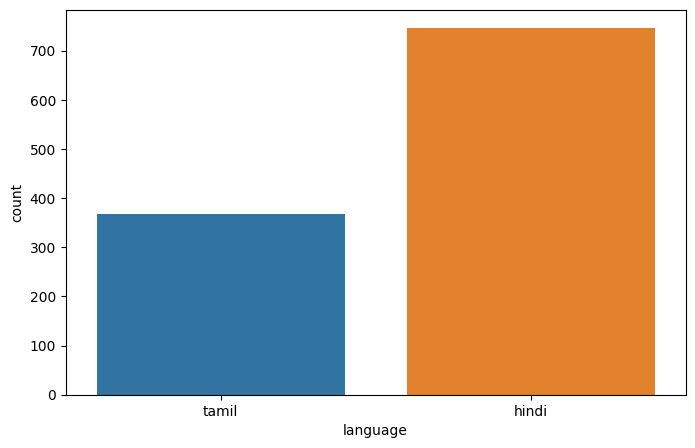

In [5]:
print("Number of training samples: ", len(dataset))
print("\nTraining data language count:\n",dataset["language"].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x="language")
plt.show()

In [6]:
# Analyze Hindi and Tamil text differently
train_hindi = dataset[dataset["language"] == "hindi" ]
train_tamil = dataset[dataset["language"] == "tamil" ]

### b) Shortest questions(based on number of words)

In [7]:
print("Hindi: \n\n")
display(sorted(train_hindi["question"].tolist() , key = lambda x : len(x.split(sep = " ")) )[:10])
print("\n\nTamil: \n\n")
display(sorted(train_tamil["question"].tolist() , key = lambda x : len(x.split(sep = " ")) )[:10])

Hindi: 




['चारमीनार किसने बनाया था?',
 'नित्यशास्त्र किसने लिखा है?',
 'सीटल शहर कहाँ स्थित है?',
 'पहला कंप्यूटर किसने बनाया था?',
 'चीन की मुद्रा क्या है?',
 'भारतीय कानून,किस पर आधारित है?',
 'तेलंगाना में कितने जिले है?',
 'सेशेल्स द्वीप कहां स्थित है?',
 '´टेलीफोन´ के आविष्कारक कौन थे?',
 'अंटार्कटिका का क्षेत्र क्या है?']



Tamil: 




['காளிதாசன் எங்கு பிறந்தார்?',
 'பென்சிலின் கண்டுபிடித்தவர் யார்?',
 'தொலைபேசியைக் கண்டுபிடித்தவர் யார்?',
 'சாக்கிரட்டீசு எப்போது பிறந்தார்?',
 'பயாப்ஸி என்றால் என்ன?',
 'நீரின் அடர்த்தி எவ்வளவு?',
 'கல்லணை கட்டியது யார்?',
 'ரேடியத்தை கண்டுபிடித்தவர் யார்?',
 'சாக்ரடீஸ் எப்படி இறந்தார்?',
 'இரும்பின் அடர்த்தி எவ்வளவு?']

### c) Longest questions(based on number of words)

In [8]:
print("Hindi: \n\n")
display(sorted(train_hindi["question"].tolist() , key = lambda x : len(x.split(sep = " ")) )[-10:])
print("\n\nTamil: \n\n")
display(sorted(train_tamil["question"].tolist() , key = lambda x : len(x.split(sep = " ")) )[-10:])

Hindi: 




['श्यामजी कृष्ण वर्मा ने इंडियन होम रूल सोसाइटी को किस साल में स्थापित किया था?',
 'भारत सरकार ने धनतेरस को किस दिवस के रूप में मनाने का निर्णय लिया है?',
 'चेन्नई में २६ दिसंबर २००४ को आई सुनामी के दौरान कितने लोगों की मौत हुई थी?',
 'भारत में कृषि में किस दशक के मध्य तक पारंपरिक बीजों का प्रयोग किया जाता था?',
 'हम साथ साथ हैं 1999 की फील में सलमान खान के किरदार का नाम क्या था?',
 'उत्तरी हिंद महासागर में बना हुदहुद तूफ़ान किस वर्ष का अब तक का सबसे ताकतवर तूफान है?',
 'किसने अल्जीरिया में काम करते हुए पहली बार लाल रक्त कोशिका के अन्दर परजीवी को देखा था?',
 'किस वैज्ञानिक ने यह विचार रखा कि कोशिकाएँ सदा कोशिकाओं के विभाजन से ही पैदा होती हैं?',
 'सन १८८६ में किसने बताया कि तम्बाकू में मोजेक रोग एक विशेष प्रकार के वाइरस के द्वारा होता है?',
 'हॉलिवुड प्रेसबिटेरियन मेडिकल सेंटर को कम्प्यूटरों का डेटा फिर से पाने के लिए हैकर्स को कितने डॉलर की फिरौती देनी पड़ी थी?']



Tamil: 




['காச நோய்க்கு எந்த ஆண்டு முதல் முதலில் மருந்து கண்டுபிடிக்கப்பட்டது?',
 'பெரியம்மை நோய் எந்த ஆண்டு இந்தியாவில் முதல் முதலில் தோன்றியது?',
 'முதல் குளிர்கால ஒலிம்பிக் விளையாட்டு போட்டி யாரால் தொடக்கி வைக்கப்பட்டது?',
 'தென்கிழக்கு ஆசிய ஒப்பந்த அமைப்பில் எத்தனை நாடுகள் உறுப்பினர்களாக உள்ளன?',
 'ஜப்பானில் முதல் முதலில் வீசப்பட்ட அணு குண்டின் பெயர் என்ன?',
 'நாடக ஆசிரியர் வில்லியம் சேக்சுபியர் எப்போது திருமணம் செய்து கொண்டார்?',
 'திமுக அரசியல் கட்சித் தலைவர் மு. கருணாநிதி எப்போது இறந்தார்?',
 'பூட்டு செய்யும் தொழிலாளியான பீட்டர் ஹென்கின் எந்த ஆண்டு கடிகாரம் உருவாக்கினார்?',
 '2009ஆம் ஆண்டில் 2 ஆஸ்கார் விருதை வென்ற இந்திய இசையமைப்பாளர் யார்?',
 'இந்திய அறிவியல் அறிஞர் சர் சந்திரசேகர வெங்கட ராமன் எப்போது பிறந்தார்?']

### d) Distribution of questions length

<Figure size 1500x800 with 0 Axes>

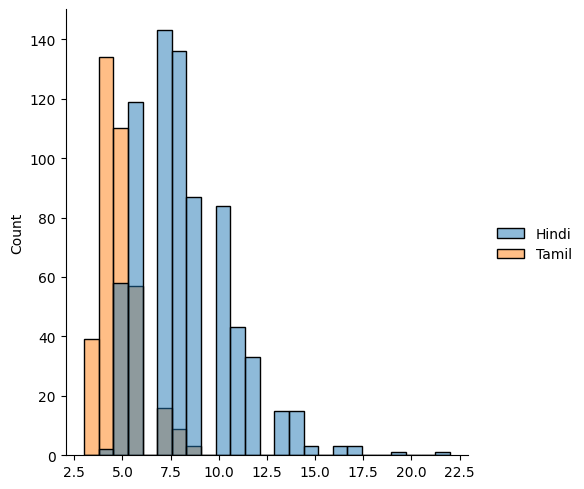

In [9]:
plt.figure(figsize = ( 15, 8))
sns.displot( data =  pd.DataFrame({ "Hindi" : train_hindi["question"].map(lambda x : len(x.split(sep = " "))) , 
                           "Tamil" : train_tamil["question"].map(lambda x : len(x.split(sep = " ")) ) }) )

### e) Distribution of answers based on Numeric or not

In [10]:
numeric_df = train_hindi["answer_text"].str.isnumeric()
len_h_numeric_non = len(numeric_df[numeric_df == False])
len_h_numeric = len(numeric_df[numeric_df == True])
numeric1_df = train_tamil["answer_text"].str.isnumeric()
len_t_numeric = len(numeric1_df[numeric1_df == True])
len_t_numeric_non = len(numeric1_df[numeric1_df == False])
len_h_numeric_non = len(numeric_df[numeric_df == False])
len_t_numeric = len(numeric1_df[numeric1_df == True])
len_t_numeric_non = len(numeric1_df[numeric1_df == False])

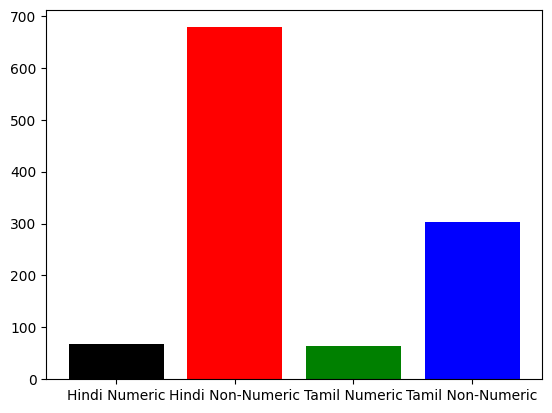

In [11]:
import matplotlib.pyplot as plt
import numpy as np
langs = ['Hindi Numeric', 'Hindi Non-Numeric', 'Tamil Numeric', 'Tamil Non-Numeric']
students = [len_h_numeric,len_h_numeric_non,len_t_numeric,len_t_numeric_non]
x_pos = np.arange(len(langs))


plt.bar(x_pos, students, color=['black', 'red', 'green', 'blue'])
plt.xticks(x_pos, langs)
plt.show()

## Pandas Profiling

pandas-profiling generates profile reports from a pandas DataFrame which is handy for exploratory data analysis. 

In [12]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_29436\1468051405.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [13]:
#creating pandas profile
profile = ProfileReport(dataset, title="Pandas Profiling Report")

In [14]:
#downloading an HTML version of Pandas Profiling Report
#profile.to_file("Pandas_Profiling_Report_of_the_chaii_dataset.html")

In [15]:
#show the interactive pandas profile inside the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Training and Evaluation

#### Evaluation Matrics - Jaccard score

The metric used in this project is the word-level Jaccard score.

The word-level Jaccard score is a measure of similarity between two sets of words that compares the intersection and union of the words in the two sets. It is calculated as the size of the intersection of the two sets divided by the size of their union.

In Natural Language Processing (NLP), the word-level Jaccard score is often used in tasks such as text classification, information retrieval, and text similarity analysis. It can help in identifying the degree of similarity between two texts based on the overlap of words in the texts. For example, it can be used to compare the similarity of two documents, to identify the similarity of search queries, or to evaluate the performance of text classification models.

One of the advantages of using the word-level Jaccard score is that it is simple to calculate and can be computed efficiently for large amounts of text data. 

Sourced at https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50, https://www.kaggle.com/competitions/chaii-hindi-and-tamil-question-answering/overview/evaluation

In [16]:
#calculate jaccard score between two strings

def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [17]:
#calculate overrall Jaccard score

def overall_jaccard_score(jaccard_score_list):
    n = len(jaccard_score_list)
    total_jaccard_score_list = sum(jaccard_score_list)
    return round(total_jaccard_score_list/n, 4)

### a) Cosine Similarity 
(simple approach)

Sources:
<br>
<br>
Tokenizer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
<br>
Blogs: https://sweetcode.io/cosine-similarity-question-answering-apps/ , https://github.com/screddy1313/Question-Answering-system-using-Cosine-similarity

Steps:
    <p>a) Remove stop words from the context and the question<p>
    <p>b) Find the sentence in the context that is most similar to the question<p>
    <p>c) Find the answer in the most similar sentence<p>

In [18]:
#imports

import nltk
nltk.download('punkt')
from tqdm.auto import tqdm 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to C:\Users\Sanath
[nltk_data]     Davis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
#loop each data, tokenise, and calculate the individual jaccard scores

predicted_answers = []
jaccard_scores = []
for index,row in tqdm(dataset.iterrows()) :
    context = row['context']
    question = row['question']
    context_tokens = word_tokenize(context)
    question_tokens = word_tokenize(question)

    # Remove stop words from the context and the question
    context_tokens = [token for token in context_tokens if not token.lower() in stop_words]
    question_tokens = [token for token in question_tokens if not token.lower() in stop_words]

    # Find the sentence in the context that is most similar to the question
    sentences = sent_tokenize(context)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)
    question_vec = vectorizer.transform([" ".join(question_tokens)])
    similarity_scores = cosine_similarity(X, question_vec)
    most_similar_sentence_index = similarity_scores.argmax()
    most_similar_sentence = sentences[most_similar_sentence_index]

    # Find the answer in the most similar sentence
    answer_tokens = word_tokenize(most_similar_sentence)
    answer = " ".join([token for token in answer_tokens if not token.lower() in stop_words])
    jaccard_score = jaccard(row['answer_text'], answer)

    # Print the answer
    if index == 0:
        print('Question ID: '  + row['id'])
        print('Question Text: '  + question)
        print('Obtained Answer: ' + answer)
        print('Actual Answer:' + row['answer_text'])
        print('Jaccard Score for this answer:' + str(jaccard_score))

    #append score and answers
    predicted_answers.append(answer)
    jaccard_scores.append(jaccard_score)

final_jaccard_score = overall_jaccard_score(jaccard_scores)
print('Overall Jaccard score of Cosine Similarity is ' + str(final_jaccard_score))

0it [00:00, ?it/s]

Question ID: 903deec17
Question Text: மனித உடலில் எத்தனை எலும்புகள் உள்ளன?
Obtained Answer: சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின்வரும் 206 ( மார்பெலும்பு மூன்று பகுதிகளாகக் கருதப்பட்டால் 208 ) எண்ணிக்கையான எலும்புகளைக் கொண்டிருக்கும் .
Actual Answer:206
Jaccard Score for this answer:0.058823529411764705
Overall Jaccard score of Cosine Similarity is 0.0219


### b) Decision Tree Classifier

Steps
<br>
<br>
Tree Based: 
For each question, the code fits the Decision Tree algorithm on the features and labels and predicts the sentence in the context that contains the answer. 
<br>
Finally, it extracts the answer from the predicted sentence and prints it

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [20]:
#loop each data, tokenise, and calculate the individual jaccard scores

from sklearn.tree import DecisionTreeClassifier

predicted_answers = []
jaccard_scores = []
for index,row in tqdm(dataset.iterrows()) :
    #print(row["question"])
    context = row['context']
    question = row['question']
    context_tokens = word_tokenize(context)
    question_tokens = word_tokenize(question)

    # Remove stop words from the context and the question
    context_tokens = [token for token in context_tokens if not token.lower() in stop_words]
    question_tokens = [token for token in question_tokens if not token.lower() in stop_words]

    # Find the sentence in the context that is most similar to the question
    sentences = sent_tokenize(context)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences).toarray()
    y = [0] * len(sentences)

    question_vec = vectorizer.transform([" ".join(question)]).toarray()
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    answer_sentence_index = clf.predict(question_vec)[0]
    answer_sentence = sentences[answer_sentence_index]
    answer_tokens = word_tokenize(answer_sentence)
    answer = " ".join([token for token in answer_tokens if not token.lower() in stop_words])

    jaccard_score = jaccard(row['answer_text'], answer)

    # Print the answer
    if index == 0:
        print('Question ID: '  + row['id'])
        print('Question ID: '  + question)
        print('Obtained Answer: ' + answer)
        print('Actual Answer:' + row['answer_text'])
        print('Jaccard Score for this answer:' + str(jaccard_score))
        
    predicted_answers.append(answer)
    jaccard_scores.append(jaccard_score)

final_jaccard_score = overall_jaccard_score(jaccard_scores)
print('Overall Jaccard score of Decision Tree Classifier is ' + str(final_jaccard_score))

0it [00:00, ?it/s]

Question ID: 903deec17
Question ID: மனித உடலில் எத்தனை எலும்புகள் உள்ளன?
Obtained Answer: சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின்வரும் 206 ( மார்பெலும்பு மூன்று பகுதிகளாகக் கருதப்பட்டால் 208 ) எண்ணிக்கையான எலும்புகளைக் கொண்டிருக்கும் .
Actual Answer:206
Jaccard Score for this answer:0.058823529411764705
Overall Jaccard score of Decision Tree Classifier is 0.0154


### c) Neural Network 

#### Transformer 1 - Default Question Answering Model

Steps
<br>
<br>
Using Transformer:
<br>
This code uses the pipeline function from the Hugging Face Transformers library to load a pre-trained question answering model. It then defines the context and the question and uses the model to generate an answer. 
<br>Finally, it prints the answer.

Sources:
<br>
https://huggingface.co/docs/transformers/tasks/question_answering

https://youtu.be/ajPx5LwJD-I

In [29]:
from transformers import pipeline

# Load the pre-trained question answering model
nlp = pipeline("question-answering")

predicted_answers = []
jaccard_scores = []
for index,row in tqdm(dataset.iterrows()) :
    #print(row["question"])
    context = row['context']
    question = row['question']
    # Use the model to generate an answer
    result = nlp(question=question, context=context)

    answer = result["answer"]
    jaccard_score = jaccard(row['answer_text'], answer)

    # Print the answer
    if index == 0:
        print('Question ID: '  + row['id'])
        print('Question ID: '  + question)
        print('Obtained Answer: ' + answer)
        print('Actual Answer:' + row['answer_text'])
        print('Jaccard Score for this answer:' + str(jaccard_score))

    predicted_answers.append(answer)
    jaccard_scores.append(jaccard_score)

final_jaccard_score = overall_jaccard_score(jaccard_scores)
print('Overall Jaccard score of Transformer is ' + str(final_jaccard_score))

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-cased-distilled-squad were not used when initializing TFDistilBertForQuestionAnswering: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForQuestionAnswering were not initialized from the model ch

0it [00:00, ?it/s]

Question ID: 903deec17
Question ID: மனித உடலில் எத்தனை எலும்புகள் உள்ளன?
Obtained Answer: 29
Actual Answer:206
Jaccard Score for this answer:0.0
Overall Jaccard score of Transformer is 0.0273


#### Transformer 2 - Hindi Specific Question Answering Model

bhavikardeshna/xlm-roberta-base-hindi is a variant of the XLM-RoBERTa model that has been fine-tuned on Hindi language data. XLM-RoBERTa is a multilingual version of the RoBERTa model, which is a state-of-the-art masked language model trained on a large corpus of text data. Fine-tuning on Hindi language data specifically helps the model to understand and generate responses in Hindi language with improved accuracy.
<br><br>
bhavikardeshna/xlm-roberta-base-hindi can be used for a wide range of natural language processing (NLP) tasks that require understanding or generation of text in Hindi language. This includes tasks such as sentiment analysis, text classification, named entity recognition, text generation, and other language understanding or generation tasks.

In [26]:
from transformers import pipeline

# Load the pre-trained question answering model
nlp = pipeline("question-answering", model="bhavikardeshna/xlm-roberta-base-hindi")

predicted_answers = []
jaccard_scores = []
for index,row in tqdm(dataset[dataset['language'] == 'hindi'].iterrows()) :
    #print(row["question"])
    context = row['context']
    question = row['question']
    # Use the model to generate an answer
    result = nlp(question=question, context=context)

    answer = result["answer"]
    jaccard_score = jaccard(row['answer_text'], answer)

    # Print the answer
    # if index == 0:
    print('Question ID: '  + row['id'])
    print('Question ID: '  + question)
    print('Obtained Answer: ' + answer)
    print('Actual Answer:' + row['answer_text'])
    print('Jaccard Score for this answer:' + str(jaccard_score))

    predicted_answers.append(answer)
    jaccard_scores.append(jaccard_score)

final_jaccard_score = overall_jaccard_score(jaccard_scores)
print('Overall Jaccard score of Transformer is ' + str(final_jaccard_score))

0it [00:00, ?it/s]

Question ID: 416091aeb
Question ID: सन १८८६ में किसने बताया कि तम्बाकू में मोजेक रोग एक विशेष प्रकार के वाइरस के द्वारा होता है?
Obtained Answer:  एडोल्फ मेयर
Actual Answer:एडोल्फ मेयर
Jaccard Score for this answer:1.0
Question ID: 9d274ae3c
Question ID: फ्लोरीन की परमाणु संख्या क्या है?
Obtained Answer:  9
Actual Answer:9
Jaccard Score for this answer:1.0
Question ID: da7397c5e
Question ID: सीटल शहर कहाँ स्थित है?
Obtained Answer:  अमेरिका के वाशिंगटन
Actual Answer:अमेरिका के वाशिंगटन राज्य
Jaccard Score for this answer:0.75
Question ID: 661880e43
Question ID: पृथ्वी को सूर्य की परिक्रमा करने में कितने दिन लागते है?
Obtained Answer:  २२ से २५ करोड़ वर्ष
Actual Answer:28 दिनों
Jaccard Score for this answer:0.0
Question ID: 3e3a2bed4
Question ID: दिल्ली नगर निगम, दिल्ली के कितने जिलों में कार्यरत है?
Obtained Answer:  नौ
Actual Answer:कुल नौ जिलों
Jaccard Score for this answer:0.3333333333333333
Question ID: 152b8bd0e
Question ID: रोटी किस अनाज से बनती है?
Obtained Answer:  मक्का, जौ, च

#### Transformer 3 - Tamil Specific Question Answering Model

AswiN037/xlm-roberta-squad-tamil is a Tamil language variant of the XLM-RoBERTa model fine-tuned on the Squad dataset, which is a question-answering benchmark dataset. XLM-RoBERTa is a multilingual version of the RoBERTa model, which is a masked language model trained on a large corpus of text data. 
<br><br>
Fine-tuning on the Squad dataset specifically helps the model to learn how to answer questions by extracting relevant information from a given context.  AswiN037/xlm-roberta-squad-tamil is trained to understand and generate responses in Tamil language, making it suitable for tasks that require question-answering capabilities in Tamil. 
<br><br>
It can be used for various applications such as information retrieval, conversational agents, and language understanding tasks that involve answering questions in Tamil.
<br><br>

In [27]:
from transformers import pipeline

# Load the pre-trained question answering model
nlp = pipeline("question-answering", model="AswiN037/xlm-roberta-squad-tamil")

predicted_answers = []
jaccard_scores = []
for index,row in tqdm(dataset[dataset['language'] == 'tamil'].iterrows()) :
    #print(row["question"])
    context = row['context']
    question = row['question']
    # Use the model to generate an answer
    result = nlp(question=question, context=context)

    answer = result["answer"]
    jaccard_score = jaccard(row['answer_text'], answer)

    # Print the answer
    # if index == 0:
    print('Question ID: '  + row['id'])
    print('Question ID: '  + question)
    print('Obtained Answer: ' + answer)
    print('Actual Answer:' + row['answer_text'])
    print('Jaccard Score for this answer:' + str(jaccard_score))

    predicted_answers.append(answer)
    jaccard_scores.append(jaccard_score)

final_jaccard_score = overall_jaccard_score(jaccard_scores)
print('Overall Jaccard score of Transformer is ' + str(final_jaccard_score))

0it [00:00, ?it/s]

Question ID: 903deec17
Question ID: மனித உடலில் எத்தனை எலும்புகள் உள்ளன?
Obtained Answer:  208)
Actual Answer:206
Jaccard Score for this answer:0.0
Question ID: d9841668c
Question ID: காளிதாசன் எங்கு பிறந்தார்?
Obtained Answer:  காசுமீரில்
Actual Answer:காசுமீரில்
Jaccard Score for this answer:1.0
Question ID: 29d154b56
Question ID: பென்சிலின் கண்டுபிடித்தவர் யார்?
Obtained Answer:  அலெக் ஸாண்டர் ஃப்பௌமிங்.
Actual Answer:சர் அலெக்ஸாண்டர் ஃபிளெமிங்
Jaccard Score for this answer:0.0
Question ID: 41660850a
Question ID: தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பாடல் எவ்வாறு அழைக்கப்படுகிறது?
Obtained Answer:  தாலாட்டு
Actual Answer:தாலாட்டு
Jaccard Score for this answer:1.0
Question ID: b29c82c22
Question ID: பூமியின் அருகில் உள்ள விண்மீன் எது?
Obtained Answer:  சூரியன் 
சூரியனும்
Actual Answer:சூரியனும்
Jaccard Score for this answer:0.5
Question ID: d419db018
Question ID: திரிதடையங்களைப் பயன்படுத்திய முதல் நிறுவனம் எது?
Obtained Answer:  IBM
Actual Answer:IBM
Jaccard Score for this ans